In [19]:
import os
import itertools
import glob
import datetime
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set_theme(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [20]:
# STAGES = [
#     0,
#     1,
#     5,
#     10,
#     25,
#     50,
#     100,
#     250,
#     500,
#     1_000,
# ] + list(range(0, 1000, 100))
STAGES = list(range(0, 1000, 100)) + [1_000]

REPEATS = 10

In [21]:
data = []

for s in STAGES:
    for i in range(1, REPEATS+1):
        with open(f"out/{s}_{i}.out") as f:
            # read line by line until "Migration info:" comes
            for line in f:
                if "Migration info:" not in line:
                    continue

                # 2024-04-30 13:19:24,887:INFO:criu-client.py: Migration info: {'other_checkpoint_size': 53769858, 'other_checkpoint_time': 1.120126227, 'receive_time': 1.1914731110000005, 'restore_size': 53769858, 'restore_time': 4.441466380000001, 'total_time': 6.054381227}

                parts = line.split(" ", 4)
                # print(parts[4])
                parts = json.loads(parts[4].replace("'", "\""))

                data.append({
                    "stage": int(s),
                    "repeat": i,
                    "other_checkpoint_size": parts["other_checkpoint_size"],
                    "other_checkpoint_time": parts["other_checkpoint_time"],
                    "receive_time": parts["receive_time"],
                    "restore_size": parts["restore_size"],
                    "restore_time": parts["restore_time"],
                    "total_time": parts["total_time"],
                    "actual_receive_time": parts["total_time"] - parts["other_checkpoint_time"] - parts["restore_time"],
                })

print(data)

[{'stage': 0, 'repeat': 1, 'other_checkpoint_size': 265087, 'other_checkpoint_time': 0.30894900300000216, 'receive_time': 0.37674483400000014, 'restore_size': 265087, 'restore_time': 3.3959915029999976, 'total_time': 3.827753831999999, 'actual_receive_time': 0.12281332599999928}, {'stage': 0, 'repeat': 1, 'other_checkpoint_size': 265476, 'other_checkpoint_time': 0.25794732399998566, 'receive_time': 0.3044430930000033, 'restore_size': 265476, 'restore_time': 3.0053939050000054, 'total_time': 3.3654795420000028, 'actual_receive_time': 0.10213831300001175}, {'stage': 0, 'repeat': 1, 'other_checkpoint_size': 265460, 'other_checkpoint_time': 0.2520173019999561, 'receive_time': 0.32200512099998946, 'restore_size': 265460, 'restore_time': 3.633321456999994, 'total_time': 4.010446344999991, 'actual_receive_time': 0.12510758600004124}, {'stage': 0, 'repeat': 1, 'other_checkpoint_size': 265639, 'other_checkpoint_time': 0.2640568019999705, 'receive_time': 0.3138812549999841, 'restore_size': 26563

In [22]:
df = pd.DataFrame(data)
df.to_csv("unsorted-results.csv")

In [23]:
df.head()

,stage,repeat,other_checkpoint_size,other_checkpoint_time,receive_time,restore_size,restore_time,total_time,actual_receive_time
0,0,1,265087,0.308949,0.376745,265087,3.395992,3.827754,0.122813
1,0,1,265476,0.257947,0.304443,265476,3.005394,3.365480,0.102138
2,0,1,265460,0.252017,0.322005,265460,3.633321,4.010446,0.125108
3,0,1,265639,0.264057,0.313881,265639,3.166444,3.550673,0.120171
4,0,2,265758,0.433464,0.481308,265758,3.278036,3.816666,0.105166


In [24]:
df.groupby("stage").mean()

,repeat,other_checkpoint_size,other_checkpoint_time,receive_time,restore_size,restore_time,total_time,actual_receive_time
stage,,,,,,,,
0,5.500000,2.660472e+05,0.282249,0.336777,2.660472e+05,3.340314,3.740346,0.117783
100,5.461538,1.063344e+08,0.893079,0.946852,1.063344e+08,5.127952,7.047390,1.026359
200,5.714286,2.114689e+08,1.447345,1.498582,2.114689e+08,6.882355,10.348490,2.018790
300,5.555556,3.168295e+08,2.028733,2.078564,3.168295e+08,8.395214,13.180388,2.756441
400,5.000000,4.221173e+08,2.544754,2.599733,4.221173e+08,10.085861,16.334114,3.703499
500,5.444444,5.270875e+08,3.200434,3.251223,5.270875e+08,11.735284,19.533252,4.597534
600,5.512821,6.324780e+08,3.795193,3.847794,6.324780e+08,13.326015,23.102873,5.981665
700,5.444444,7.378530e+08,4.414378,4.464899,7.378530e+08,15.003767,26.351831,6.933686
800,5.125000,8.431979e+08,4.891195,4.943016,8.431979e+08,16.579004,29.613542,8.143343


<Axes: xlabel='stage', ylabel='total_time'>

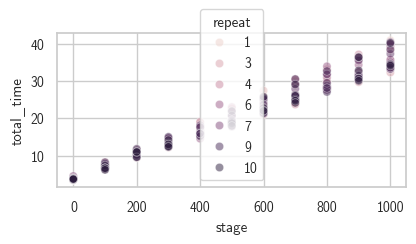

In [25]:
sns.scatterplot(data=df, x='stage', y='total_time', hue='repeat', alpha=0.5)

<Axes: xlabel='stage', ylabel='other_checkpoint_size'>

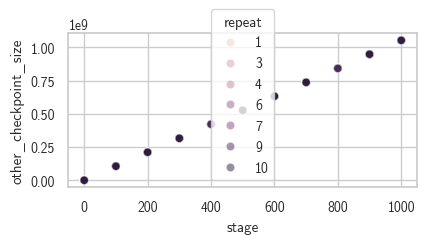

In [26]:
sns.scatterplot(data=df, x='stage', y='other_checkpoint_size', hue='repeat', alpha=0.5)

In [27]:
# make a scatterplot with all the data in different colors
df_stacked = df.melt(id_vars=['stage', 'repeat'], value_vars=['other_checkpoint_size', 'other_checkpoint_time', 'receive_time', 'restore_size', 'restore_time', 'total_time', 'actual_receive_time'], var_name='metric', value_name='value')
df_stacked.head()

,stage,repeat,metric,value
0,0,1,other_checkpoint_size,265087.0
1,0,1,other_checkpoint_size,265476.0
2,0,1,other_checkpoint_size,265460.0
3,0,1,other_checkpoint_size,265639.0
4,0,2,other_checkpoint_size,265758.0


<Axes: xlabel='stage', ylabel='value'>

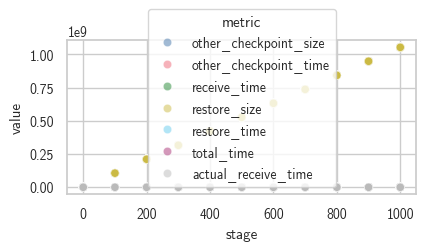

In [28]:
sns.scatterplot(data=df_stacked, x='stage', y='value', hue='metric', alpha=0.5)

In [29]:
# maybe stack it in a way where the resize is on the x axis
df_stacked = df.melt(id_vars=['stage', 'restore_size'], value_vars=[ 'other_checkpoint_time', 'receive_time', 'restore_time', 'total_time', 'actual_receive_time'], var_name='metric', value_name='value')

In [30]:
df_stacked.head()

,stage,restore_size,metric,value
0,0,265087,other_checkpoint_time,0.308949
1,0,265476,other_checkpoint_time,0.257947
2,0,265460,other_checkpoint_time,0.252017
3,0,265639,other_checkpoint_time,0.264057
4,0,265758,other_checkpoint_time,0.433464


In [31]:
# convert the restore size to MB, round to 2 decimal places
df_stacked['restore_size'] = df_stacked['restore_size'] / 1024 / 1024
df_stacked['restore_size'] = df_stacked['restore_size'].round(3)
df_stacked.tail()

,stage,restore_size,metric,value
1990,1000,1005.744,actual_receive_time,9.701998
1991,1000,1005.744,actual_receive_time,9.110785
1992,1000,1003.640,actual_receive_time,9.748200
1993,1000,1004.669,actual_receive_time,9.385607
1994,1000,1005.658,actual_receive_time,9.490314


<Axes: xlabel='stage', ylabel='value'>

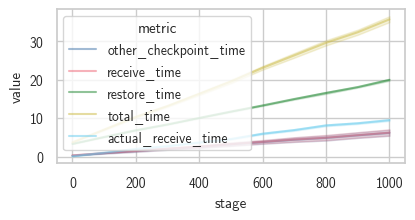

In [32]:
sns.lineplot(data=df_stacked, x='stage', y='value', hue='metric', alpha=0.5)

In [33]:
# make a mean
df_mean = df_stacked.groupby(['stage', 'metric']).mean().reset_index()

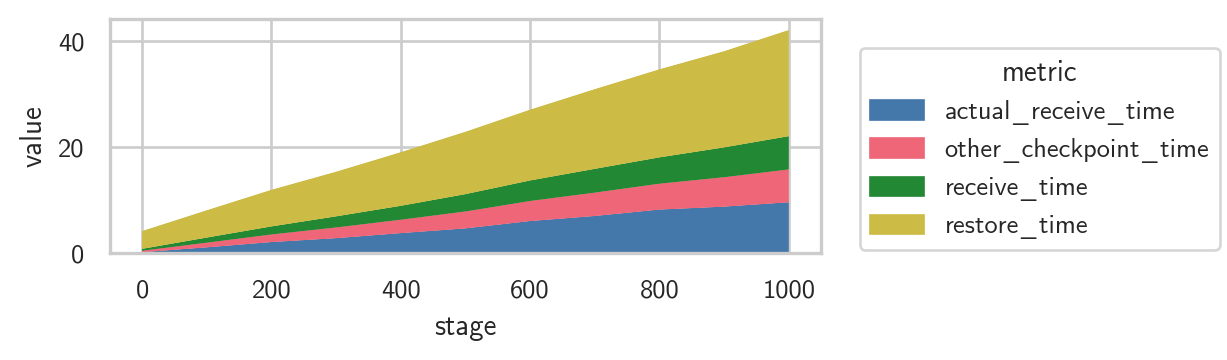

In [34]:
import seaborn.objects as so

# filter out total time
df_mean = df_mean[df_mean['metric'] != 'total_time']

so.Plot.config.theme.update(mpl.rcParams)

(
    so.Plot(df_mean, x='stage', y='value', color='metric')
    # .add(so.Line())
    .add(so.Area(alpha=1), so.Stack(), edgecolor=None)
)

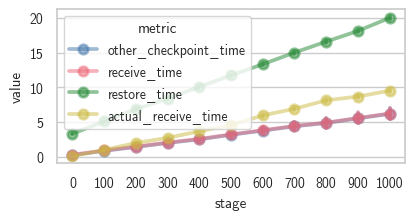

In [35]:
g = sns.pointplot(data=df_stacked[df_stacked["metric"] != "total_time"], x='stage', y='value', hue='metric', alpha=0.5)
# g.set(xscale='log')

/var/folders/2f/b2y6thfs2051_m0fs57vb_sc0000gn/T/ipykernel_81610/1512219024.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  g = sns.pointplot(data=pretty_df, x='stage', y='value', hue='Time', alpha=0.8, hue_order=["Checkpoint", "Transfer", "Restore"], linestyles=["solid", "dashed", "dotted"], linewidth=2, errwidth=3, markers=None, native_scale=True)
webf NOT subset; don't know how to subset; dropped


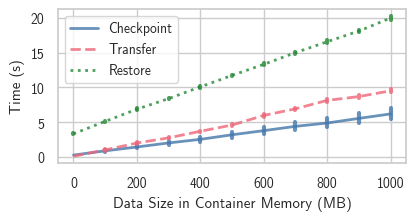

In [36]:
pretty_df = df_stacked[(df_stacked['metric'] == 'restore_time') | (df_stacked['metric'] == 'actual_receive_time') | (df_stacked['metric'] == 'other_checkpoint_time')].copy()
pretty_df["Time"] = pretty_df["metric"].map({
    "actual_receive_time": "Transfer",
    "other_checkpoint_time": "Checkpoint",
    "restore_time": "Restore",
})

g = sns.pointplot(data=pretty_df, x='stage', y='value', hue='Time', alpha=0.8, hue_order=["Checkpoint", "Transfer", "Restore"], linestyles=["solid", "dashed", "dotted"], linewidth=2, errwidth=3, markers=None, native_scale=True)
g.set_xlabel("Data Size in Container Memory (MB)")
g.set_ylabel("Time (s)")
g.legend(title=None)
# pretty_df.to_csv("sorted-results.csv")
plt.savefig("migration_time.pdf", bbox_inches='tight')